## Bugün en çok kullanmış olduğum M2 Metro hattını inceliycez.

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import openpyxl
pd.plotting.register_matplotlib_converters()
import seaborn as sns
 

### Veri setinde abonman fiyat bilgileri olmadığı için kendim ufak bir google aramasıyla o yıllara ait abonman bilgilerini alıp bir dataframe oluşturdum ki metro kullanımındaki artış azalışı daha iyi anlayabilelim. (Spoiler alert: Anlayamayacağız🥲)

In [155]:
abonman = {2017:85, 2018:85, 2019:40}  
abonman_df = pd.DataFrame(abonman.items(), columns=['Yıl', 'Abonman Ücreti(TL)'])
abonman_df

,Yıl,Abonman Ücreti(TL)
0,2017,85
1,2018,85
2,2019,40


### Keşke csv verselermiş diye üzülerek başladığımız yolda yılmadan devam ediyoruz.

In [6]:
PATH = '/Users/egemeneroglu/Desktop/software/datasets/rayl-sistemler-gunluk-aylkyllk-hat-bazl-sefer-saylar.xlsx'

### Ve sadece 2017-2019 yılları arasını kapsaması üzdü, 2022'deyiz biraz güncelleyin lütfen🙏🏻

In [159]:
xls = pd.ExcelFile(PATH)
df = pd.read_excel(xls, 'Raylı Sis. Hat Bazlı Sefer S.')
df

,Yıl,Periyot,M1 Hattı,M2 Hattı,M3 Hattı,M4 Hattı,M5 Hattı,M6 Hattı,T1 Hattı,T3 Hattı,T4 Hattı,F1 Hattı,TF1 Hattı,TF2 Hattı
0,2017,Günlük,692.0,744.60,531.00,378.0,270.0,242.00,687.00,73,390,383,64.0,198.00
1,2017,Aylık,21052.0,22648.25,16143.25,11500.5,4050.0,7360.00,20892.00,2222,11872,11661,1953.0,6026.00
2,2017,Yıllık,252628.0,271779.00,193719.00,138006.0,4050.0,88321.00,250704.00,26659,142468,139932,23440.0,72314.00
3,2018,Günlük,695.0,739.00,528.00,375.0,275.0,240.00,715.00,82,401,383,81.0,214.00
4,2018,Aylık,21128.0,22485.25,16054.25,11406.0,8352.0,7313.00,21744.25,2507,12194,11656,2452.5,6502.75
5,2018,Yıllık,253532.0,269823.00,192651.00,136874.0,100223.5,87757.00,260931.00,30079,146333,139872,29430.0,78033.00
6,2019,Günlük,700.0,695.00,532.00,377.0,348.0,261.00,758.00,70,420,387,87.0,197.00
7,2019,Aylık,21296.5,21147.00,16180.75,11462.0,10585.0,7951.75,23063.00,2136,12783,11782,2658.0,5980.00
8,2019,Yıllık,255558.0,253764.00,194169.00,137546.0,127022.0,95421.00,276752.00,25626,153397,141385,31894.0,71758.00


### İlginç bir şekilde missing value yok!🥳

In [160]:
def check_df(dataframe, head=5):
    print('##################### Shape #####################')
    print(dataframe.shape)

    print('##################### Types #####################')
    print(dataframe.dtypes)

    print('##################### Head #####################')
    print(dataframe.head(head))

    print('##################### Tail #####################')
    print(dataframe.tail(head))

    print('##################### is null? #####################')
    print(dataframe.isnull().sum())

    print('##################### Quantiles #####################')
    print(dataframe.quantile([0, 0.25, 0.50, 0.75, 0.99, 1]).T)
    print(dataframe.describe().T)


check_df(df)

##################### Shape #####################
(9, 14)
##################### Types #####################
Yıl            int64
Periyot       object
M1 Hattı     float64
M2 Hattı     float64
M3 Hattı     float64
M4 Hattı     float64
M5 Hattı     float64
M6 Hattı     float64
T1 Hattı     float64
T3 Hattı       int64
T4 Hattı       int64
F1 Hattı       int64
TF1 Hattı    float64
TF2 Hattı    float64
dtype: object
##################### Head #####################
    Yıl Periyot  M1 Hattı   M2 Hattı   M3 Hattı  M4 Hattı  M5 Hattı  M6 Hattı  \
0  2017  Günlük     692.0     744.60     531.00     378.0     270.0     242.0   
1  2017   Aylık   21052.0   22648.25   16143.25   11500.5    4050.0    7360.0   
2  2017  Yıllık  252628.0  271779.00  193719.00  138006.0    4050.0   88321.0   
3  2018  Günlük     695.0     739.00     528.00     375.0     275.0     240.0   
4  2018   Aylık   21128.0   22485.25   16054.25   11406.0    8352.0    7313.0   

    T1 Hattı  T3 Hattı  T4 Hattı  F1 Hattı  TF1 

### Sadece M2 Hattını inceleyeceğimiz için gerekli kısımları alıyorum.

In [24]:
df_m2 = df[['Yıl', 'Periyot', 'M2 Hattı']]
df_m2

,Yıl,Periyot,M2 Hattı
0,2017,Günlük,744.60
1,2017,Aylık,22648.25
2,2017,Yıllık,271779.00
3,2018,Günlük,739.00
4,2018,Aylık,22485.25
5,2018,Yıllık,269823.00
6,2019,Günlük,695.00
7,2019,Aylık,21147.00
8,2019,Yıllık,253764.00


### Yani şu periyot kolonu tamamen üşengeçlik yapsana günlük_periyot, aylık_periyot diye.. <br>Neyse her şeyi devletten beklememek lazım diyip kendimiz ayırıyoruz.

In [151]:
by_year = df_m2.groupby(['Yıl', 'Periyot'])
by_year.first()

M2 Hattı
Yıl  Periyot           
2017 Aylık     22648.25
     Günlük      744.60
     Yıllık   271779.00
2018 Aylık     22485.25
     Günlük      739.00
     Yıllık   269823.00
2019 Aylık     21147.00
     Günlük      695.00
     Yıllık   253764.00

### Yukardaki çok ayrık gelmedi daha da paramparça edip bölmeye devam ediyoruz.

In [41]:
daily = df_m2.loc[df_m2.Periyot == 'Günlük']
daily

,Yıl,Periyot,M2 Hattı
0,2017,Günlük,744.6
3,2018,Günlük,739.0
6,2019,Günlük,695.0


In [43]:
monthly = df_m2.loc[df_m2.Periyot == 'Aylık']
monthly

,Yıl,Periyot,M2 Hattı
1,2017,Aylık,22648.25
4,2018,Aylık,22485.25
7,2019,Aylık,21147.00


In [74]:
yearly = df_m2.loc[df_m2.Periyot == 'Yıllık']
yearly

,Yıl,Periyot,M2 Hattı
2,2017,Yıllık,271779.0
5,2018,Yıllık,269823.0
8,2019,Yıllık,253764.0


### Tutarsızlığı fark ettiniz mi? Abonman fiyatının en pahalı olduğu 2017/2018 yılında hem günlük hem aylık hem de yıllık olarak kullanım oranı, abonman fiyatının %53'lük bir indirim aldığı 2019 yılına göre daha fazla. Neyse bir de ufağından görselleştirelim..

Text(0, 0.5, 'Günlük Periyot')

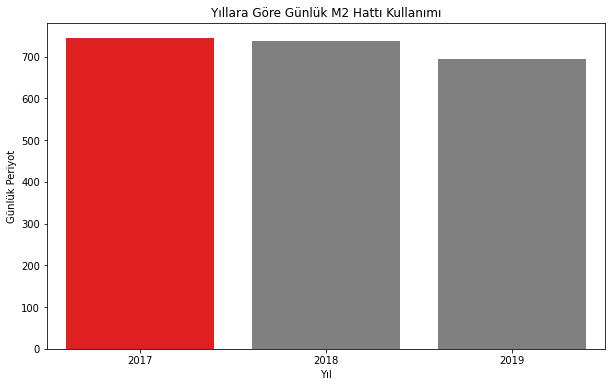

In [105]:
plt.figure(figsize=(10,6))
plt.title('Yıllara Göre Günlük M2 Hattı Kullanımı')
clrs = ['grey' if (x < max(daily['M2 Hattı'])) else 'red' for x in daily['M2 Hattı']]
sns.barplot(x=daily.Yıl, y=daily['M2 Hattı'], palette=clrs)
plt.ylabel("Günlük Periyot")

Text(0, 0.5, 'Aylık Periyot')

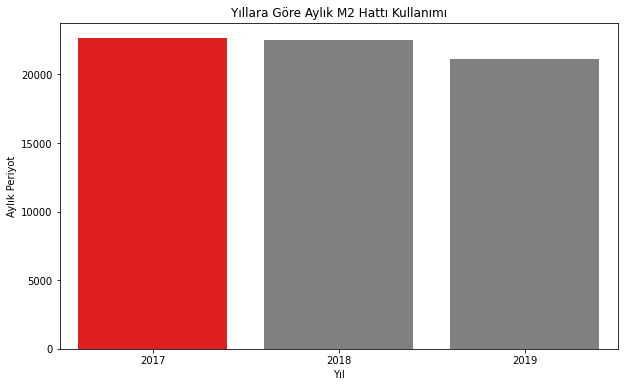

In [107]:
plt.figure(figsize=(10,6))
plt.title('Yıllara Göre Aylık M2 Hattı Kullanımı')
clrs = ['grey' if (x < max(monthly['M2 Hattı'])) else 'red' for x in monthly['M2 Hattı']]
sns.barplot(x=monthly.Yıl, y=monthly['M2 Hattı'], palette=clrs)
plt.ylabel('Aylık Periyot')

Text(0, 0.5, 'Yıllık Periyot')

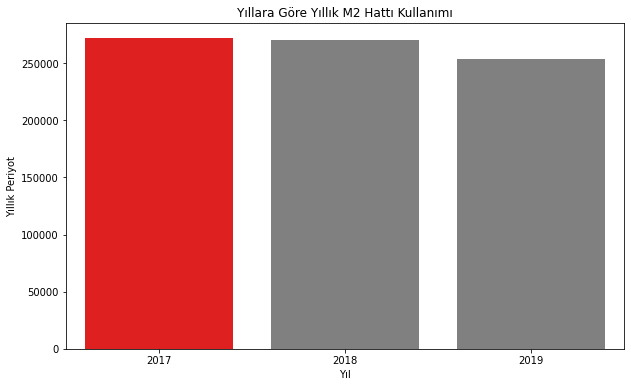

In [108]:
plt.figure(figsize=(10,6))
plt.title('Yıllara Göre Yıllık M2 Hattı Kullanımı')
clrs = ['grey' if (x < max(yearly['M2 Hattı'])) else 'red' for x in yearly['M2 Hattı']]
sns.barplot(x=yearly.Yıl, y=yearly['M2 Hattı'], palette=clrs)
plt.ylabel('Yıllık Periyot')

### data.ibb'den ricalar😇: <br>
 - Güncel dataları getirirseniz sevinirim.
 - Data spesifik kolonlar ve tercihen ingilizce kolon isimleri.
 - Verilerin doğruluğu da bir sorgulanabilir bana çok gerçekçi gelmedi.(Veri toplamayı basılan akbile göre alıyorsanız yanlış olması çok muhtemel değil ama ben yine söyliyim.)